<a href="https://colab.research.google.com/github/shruti1610/Weather-Forecasting/blob/master/RNN_and_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Applying RNN and LSTM on dataset**

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.


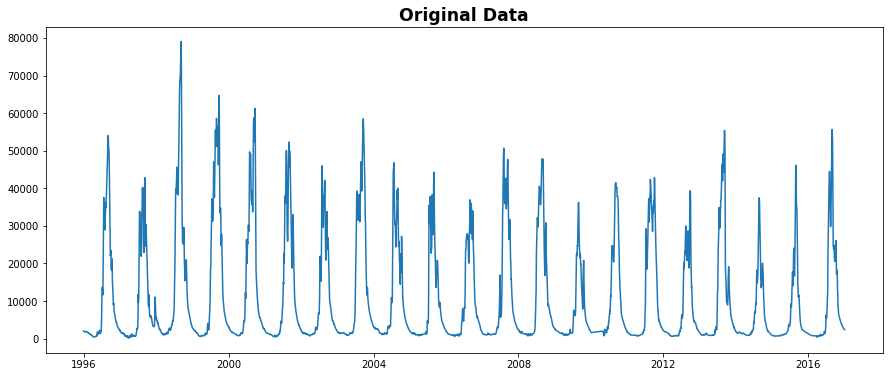

In [1]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
import math
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from matplotlib import style
import datetime
import matplotlib.dates
from datetime import datetime
from __future__ import division




rcParams['figure.figsize'] = 15, 6
rcParams['axes.titlesize'] = 'xx-large'
rcParams['axes.titleweight'] = 'bold'
rcParams["legend.loc"] = 'upper left'

url = 'https://raw.githubusercontent.com/shruti1610/Weather-Forecasting/master/datasets/Ganges_1996_2016.csv'
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date',date_parser=dateparse)
data = data.astype('float64')
data.dropna(inplace = True)
plt.title("Original Data")
plt.plot(data)


def dropna():
  for i in range(1,len(data)):                                             #assume first value is not absent
      if math.isnan(data['Q (m3/s)'][i]):    
        data['Q (m3/s)'][i] = data['Q (m3/s)'][i-1]
      
  data.plot()
  return data


**Plot RNN and LSTM for Original Data**

In [2]:
#RNN & LSTM


def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence.iloc[i:end_ix].values, sequence.iloc[end_ix].values
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

n_steps = 20
X, y = split_sequence(data, n_steps)
#print (X)
#print(y)
print ('(samples, timesteps, features): '+ str(X.shape))

X_train, y_train = X[:-2536],y[:-2536]
X_valid, y_valid = X[-2536:-1806],y[-2536:-1806]
X_test, y_test = X[-1806:],y[-1806:]
print (X_train.shape,X_valid.shape,X_test.shape)


rnn = Sequential()
rnn.add(SimpleRNN(10, activation='relu', input_shape=(n_steps, 1)))
rnn.add(Dense(1))
rnn.compile(optimizer='adam', loss='mse')

rnn.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs=400, verbose=1 )


print(rnn.summary())

# make predictions
predict = rnn.predict(X_test)
# calculate root mean squared error
testScore = math.sqrt(mean_squared_error(y_test, predict))


(samples, timesteps, features): (7567, 20, 1)
(5031, 20, 1) (730, 20, 1) (1806, 20, 1)
Train on 5031 samples, validate on 730 samples
Epoch 1/400
5031/5031 [==============================] - 1s 188us/step - loss: 79027900.0052 - val_loss: 1479249.9998
Epoch 2/400
5031/5031 [==============================] - 1s 106us/step - loss: 2983151.6970 - val_loss: 1201817.2336
Epoch 3/400
5031/5031 [==============================] - 1s 107us/step - loss: 2146566.7494 - val_loss: 920167.7346
Epoch 4/400
5031/5031 [==============================] - 1s 106us/step - loss: 1386291.9276 - val_loss: 906479.6753
Epoch 5/400
5031/5031 [==============================] - 1s 107us/step - loss: 912349.9031 - val_loss: 410668.4093
Epoch 6/400
5031/5031 [==============================] - 1s 104us/step - loss: 768187.2542 - val_loss: 347559.3475
Epoch 7/400
5031/5031 [==============================] - 1s 103us/step - loss: 733982.5775 - val_loss: 314021.5584
Epoch 8/400
5031/5031 [==============================]

Test Score: 480.06 RMSE


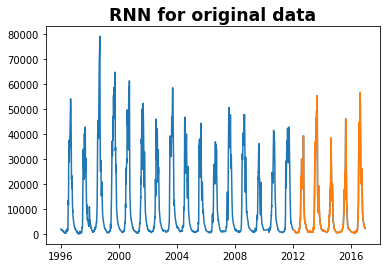

Mean Absolute Error= 206.20377855945137
Mean Squared Error= 230458.2301231727
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
None
Test Score: 480.06 RMSE


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


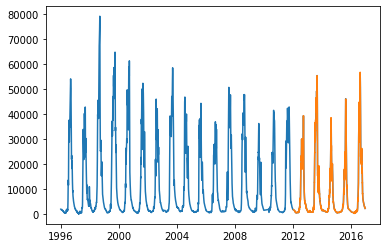

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=20, activation="relu", units=1)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=20, activation="softmax", units=1)`


In [4]:
#Plot RNN for original Data

print('Test Score: %.2f RMSE' % (testScore))




predict_plot = pd.DataFrame(predict,index=data.index[-1806:])
plt.plot(data)
plt.title("RNN for original data")
plt.plot(predict_plot)
plt.show()


print('Mean Absolute Error=', metrics.mean_absolute_error(y_test, predict))
print('Mean Squared Error=' , metrics.mean_squared_error(y_test, predict))



from keras import regularizers

rnn.add(Dense(1, input_dim=20,
                kernel_regularizer=regularizers.l2(0.01)))


print(rnn.summary())

# make predictions
predict = rnn.predict(X_test)
# calculate root mean squared error
testScore = math.sqrt(mean_squared_error(y_test, predict))
print('Test Score: %.2f RMSE' % (testScore))


predict_plot = pd.DataFrame(predict,index=data.index[-1806:])
#pyplot.title('Regularisation for RNN ')
plt.plot(data)
plt.plot(predict_plot)
plt.show()



from keras.layers.core import Dropout

rnn = Sequential([
 Dense(output_dim=1, input_dim=20, activation='relu'),
 Dropout(0.25),

Dense(output_dim=1, input_dim=20, activation='softmax'),
 ])


In [5]:
# LSTM for Original Data
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

model = Sequential()
model.add(LSTM(10, activation='linear', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history=model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs=400, verbose=1)
#print(model.summary())




Train on 5031 samples, validate on 730 samples
Epoch 1/400
5031/5031 [==============================] - 2s 307us/step - loss: 273056616.8005 - val_loss: 106680992.2452
Epoch 2/400
5031/5031 [==============================] - 1s 242us/step - loss: 62339767.9754 - val_loss: 33372082.5603
Epoch 3/400
5031/5031 [==============================] - 1s 241us/step - loss: 18913452.6208 - val_loss: 3809238.7826
Epoch 4/400
5031/5031 [==============================] - 1s 242us/step - loss: 6624639.9517 - val_loss: 3035860.6414
Epoch 5/400
5031/5031 [==============================] - 1s 241us/step - loss: 9464555.2799 - val_loss: 5389576.3617
Epoch 6/400
5031/5031 [==============================] - 1s 244us/step - loss: 3926447.2390 - val_loss: 1428335.0825
Epoch 7/400
5031/5031 [==============================] - 1s 246us/step - loss: 3083501.2846 - val_loss: 1359658.1465
Epoch 8/400
5031/5031 [==============================] - 1s 251us/step - loss: 2953618.9690 - val_loss: 1293046.7957
Epoch 9/40

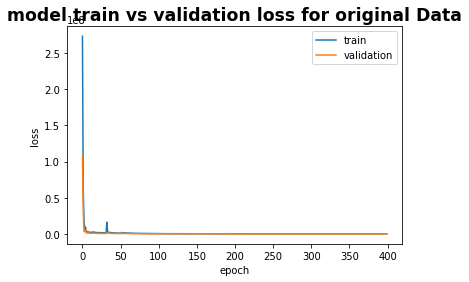

In [6]:
#Plot LSTM for original Data
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss for original Data')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# make predictions
predict = model.predict(X_test)
# calculate root mean squared error


Test Score: 479.36 RMSE


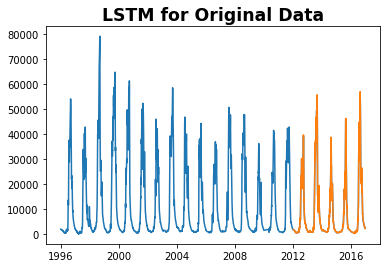

In [7]:
#Plot LSTM for Original Data
testScore = math.sqrt(mean_squared_error(y_test, predict))
print('Test Score: %.2f RMSE' % (testScore))

predict_plot = pd.DataFrame(predict,index=data.index[-1806:])
plt.plot(data)
plt.title("LSTM for Original Data")
plt.plot(predict_plot)

plt.show()

**Plot RNN and LSTM for Stationary Data**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


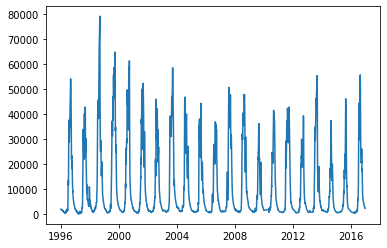

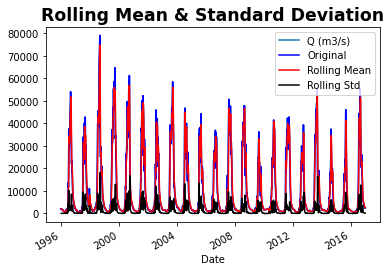

Results of Dickey-Fuller Test:
Test Statistic                -8.635209e+00
p-value                        5.614958e-14
#Lags Used                     3.600000e+01
Number of Observations Used    7.550000e+03
Critical Value (1%)           -3.431216e+00
Critical Value (5%)           -2.861923e+00
Critical Value (10%)          -2.566974e+00
dtype: float64


In [8]:
#Make Data Stationary


url = 'https://raw.githubusercontent.com/shruti1610/Weather-Forecasting/master/datasets/Ganges_1996_2016.csv'
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date',date_parser=dateparse)
data = data.astype('float64')
data.dropna(inplace = True)
plt.plot(data)


def dropna():
  for i in range(1,len(data)):                                             #assume first value is not absent
      if math.isnan(data['Q (m3/s)'][i]):    
        data['Q (m3/s)'][i] = data['Q (m3/s)'][i-1]
      
  data.plot()
  return data

dropna()

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

ts_log_x = np.log(data)

test_stationarity(data['Q (m3/s)'])



In [9]:
#Part3
n_steps = 20
X, y = split_sequence(data, n_steps)
#print (X)
#print(y)
print ('(samples, timesteps, features): '+ str(X.shape))

X_train, y_train = X[:-2536],y[:-2536]
X_valid, y_valid = X[-2536:-1806],y[-2536:-1806]
X_test, y_test = X[-1806:],y[-1806:]
print (X_train.shape,X_valid.shape,X_test.shape)


(samples, timesteps, features): (7567, 20, 1)
(5031, 20, 1) (730, 20, 1) (1806, 20, 1)


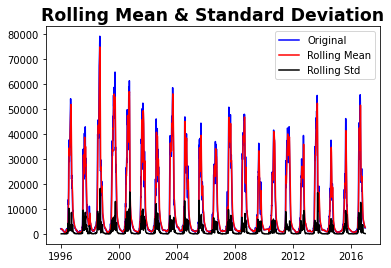

Results of Dickey-Fuller Test:
Test Statistic                -8.635209e+00
p-value                        5.614958e-14
#Lags Used                     3.600000e+01
Number of Observations Used    7.550000e+03
Critical Value (1%)           -3.431216e+00
Critical Value (5%)           -2.861923e+00
Critical Value (10%)          -2.566974e+00
dtype: float64


In [10]:
#remove seasonality to make data stationary


#function which help to remove seasonality

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return np.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

test_stationarity(data['Q (m3/s)'])

# Remove Seasnality using Seasonal difference
X = X_train
Y = y_train
days_in_year = 365
differenced = difference(X, days_in_year)
differenced_y = difference(Y, days_in_year)



In [15]:

#Plot RNN for Stationary Data

rnn = Sequential()
rnn.add(SimpleRNN(10, activation='relu', input_shape=(n_steps, 1)))
rnn.add(Dense(1))
rnn.compile(optimizer='adam', loss='mse')

rnn.fit(differenced, differenced_y, validation_data = (X_valid, y_valid), epochs=400, verbose=1 )


print(rnn.summary())



Train on 4666 samples, validate on 730 samples
Epoch 1/400
4666/4666 [==============================] - 1s 143us/step - loss: 56777466.1312 - val_loss: 3592505.9575
Epoch 2/400
4666/4666 [==============================] - 1s 115us/step - loss: 20060158.5626 - val_loss: 2667806.8793
Epoch 3/400
4666/4666 [==============================] - 0s 107us/step - loss: 2590705.7426 - val_loss: 1075225.3375
Epoch 4/400
4666/4666 [==============================] - 0s 103us/step - loss: 1813670.7287 - val_loss: 931156.8937
Epoch 5/400
4666/4666 [==============================] - 0s 102us/step - loss: 1677851.7090 - val_loss: 1683726.8856
Epoch 6/400
4666/4666 [==============================] - 0s 105us/step - loss: 1644912.7554 - val_loss: 1145843.4245
Epoch 7/400
4666/4666 [==============================] - 0s 102us/step - loss: 1588934.0868 - val_loss: 535205.1739
Epoch 8/400
4666/4666 [==============================] - 1s 107us/step - loss: 1489810.5601 - val_loss: 2307626.5160
Epoch 9/400
4666/

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
None
Test Score: 574.60 RMSE


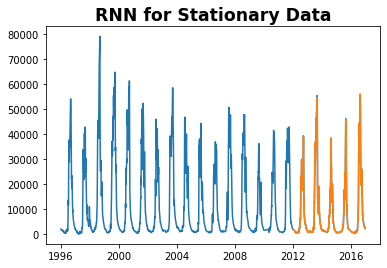

In [16]:
#Plot RNN for Stationary Data

# make predictions
predict = rnn.predict(differenced)

print(rnn.summary())

# make predictions
predict = rnn.predict(X_test)

# calculate root mean squared error
testScore = math.sqrt(mean_squared_error(y_test, predict))
print('Test Score: %.2f RMSE' % (testScore))

predict_plot = pd.DataFrame(predict,index=data.index[-1806:])
plt.plot(data)
plt.title("RNN for Stationary Data")
plt.plot(predict_plot)
plt.show()


In [17]:

#Plot LSTM for stationary data
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

model = Sequential()
model.add(LSTM(10, activation='linear', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history=model.fit(differenced, differenced_y, validation_data = (X_valid, y_valid), epochs=400, verbose=1)
#print(model.summary())




Train on 4666 samples, validate on 730 samples
Epoch 1/400
4666/4666 [==============================] - 2s 323us/step - loss: 1250721357.4659 - val_loss: 906846032.2466
Epoch 2/400
4666/4666 [==============================] - 1s 250us/step - loss: 194578098.7913 - val_loss: 354255580.1479
Epoch 3/400
4666/4666 [==============================] - 1s 256us/step - loss: 95948981.0476 - val_loss: 252283106.5514
Epoch 4/400
4666/4666 [==============================] - 1s 256us/step - loss: 84102763.9949 - val_loss: 476521960.0384
Epoch 5/400
4666/4666 [==============================] - 1s 260us/step - loss: 94807706.1432 - val_loss: 173566089.5596
Epoch 6/400
4666/4666 [==============================] - 1s 250us/step - loss: 92270248.1406 - val_loss: 123407538.0842
Epoch 7/400
4666/4666 [==============================] - 1s 266us/step - loss: 72412687.3502 - val_loss: 221918427.1565
Epoch 8/400
4666/4666 [==============================] - 1s 246us/step - loss: 82317726.4938 - val_loss: 52147

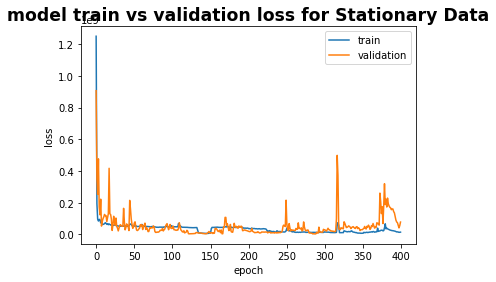

Test Score: 7978.75 RMSE


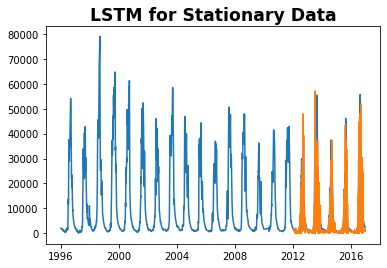

In [19]:
#Plot LSTM for Stationary Data
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss for Stationary Data')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# make predictions
predict = model.predict(X_test)
# calculate root mean squared error
testScore = math.sqrt(mean_squared_error(y_test, predict))
print('Test Score: %.2f RMSE' % (testScore))

predict_plot = pd.DataFrame(predict,index=data.index[-1806:])
plt.plot(data)
plt.title("LSTM for Stationary Data")
plt.plot(predict_plot)
plt.show()



> The RNN(Recurrent Neural Network) model for the orginial raw data produced a RMSE score less then that on stationary Data. The LSTM(long short term memory) plotted from the orginal data produced a RMSE value less then the stationary data produced. 

> The RNN and the LSTM models both produced a smaller RMSE score on the orginal raw data as opposed to the stationary data.

> Long Short Term Memory Neural Networks are a good solution to modeling non-stationary and nonlinear time series. Hence the scores are better for original data.





